In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
df = pd.read_table('house_prices.txt',delim_whitespace=True)

In [52]:
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['Value','Square_Footage','Number_Bedrooms']],df['Price'],test_size=0.33)

lg = XGBRegressor(
    n_estimators =10000,
    learning_rate=0.009,
    n_jobs=-1
)
lg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.009, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=10000,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [53]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,lg.predict(X_test))

123.68717729413176

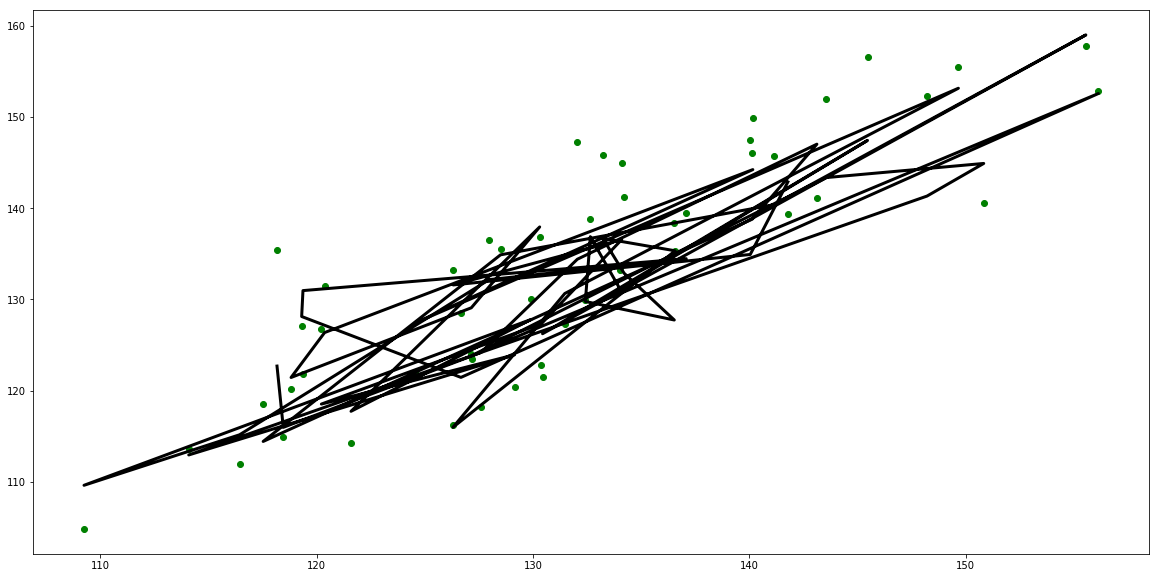

In [20]:
fig,ax = plt.subplots(figsize=(20,10))
plt.scatter(X_test['Value'], y_test,  color='green')
plt.plot(X_test['Value'], lg.predict(X_test), color='black', linewidth=3)